<a href="https://colab.research.google.com/github/mahathirarf/Data-Analysis/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [6]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [8]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [9]:
numerical = train.drop(['day', 'id', 'rainfall'], axis =1)
numerical

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


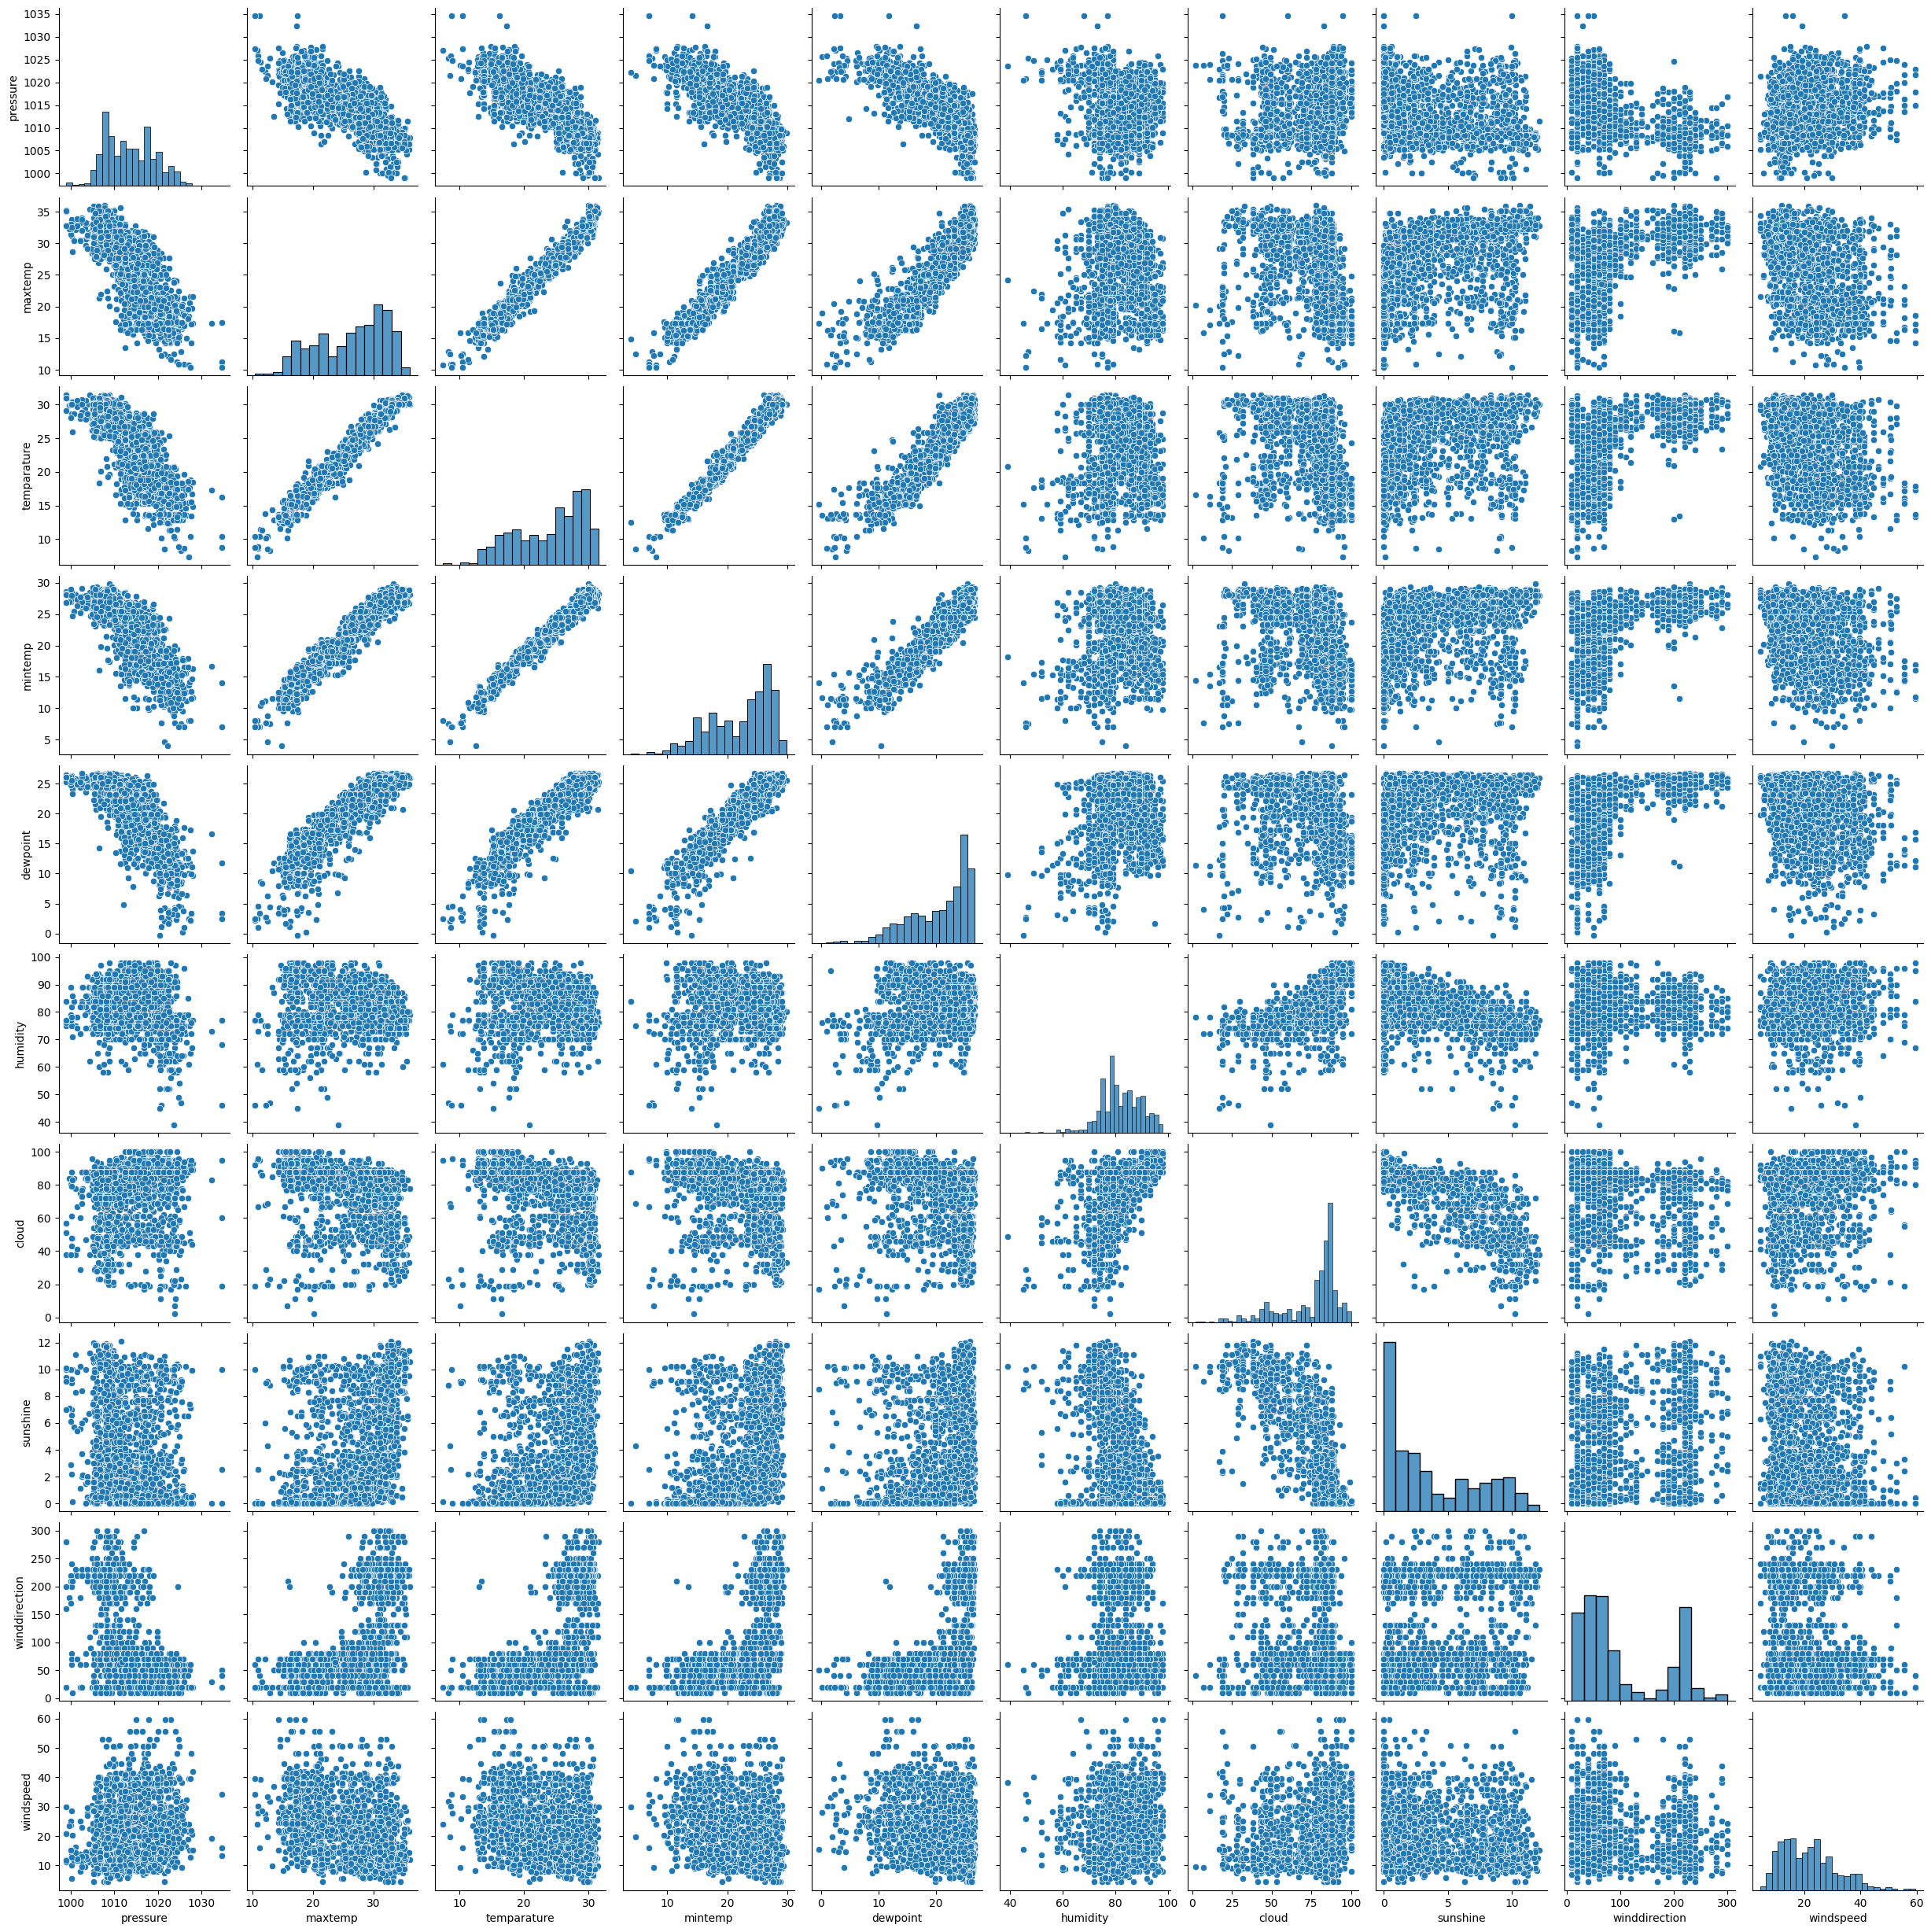

In [10]:
sns.pairplot(numerical)

<Axes: >

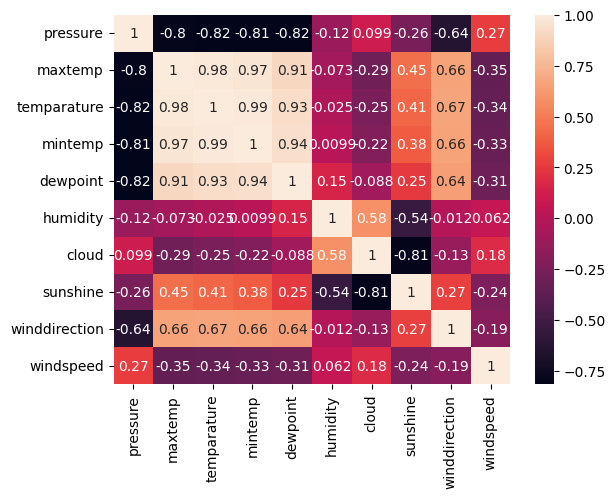

In [11]:
sns.heatmap(numerical.corr(), annot = True)

In [12]:
from scipy.stats import pointbiserialr

In [13]:
corr, p_value = pointbiserialr(train[['pressure']], train[['rainfall']])
print(corr, p_value)

[-0.04988555] [0.01956243]


In [14]:
pointbi = []
for i in numerical.columns:
    corr, p_value = pointbiserialr(train[[i]], train[['rainfall']])
    a = [i, corr, p_value]
    pointbi.append(a)
    print(i, corr, p_value)

pressure [-0.04988555] [0.01956243]
maxtemp [-0.07930352] [0.00020326]
temparature [-0.0496602] [0.02012137]
mintemp [-0.02684147] [0.20925344]
dewpoint [0.08196504] [0.00012302]
humidity [0.45421348] [6.1945241e-112]
cloud [0.6411912] [6.7445083e-254]
sunshine [-0.55528692] [2.12338143e-177]
winddirection [-0.00693912] [0.74552046]
windspeed [0.11162459] [1.63087127e-07]


In [15]:
pointbi

[['pressure', array([-0.04988555]), array([0.01956243])],
 ['maxtemp', array([-0.07930352]), array([0.00020326])],
 ['temparature', array([-0.0496602]), array([0.02012137])],
 ['mintemp', array([-0.02684147]), array([0.20925344])],
 ['dewpoint', array([0.08196504]), array([0.00012302])],
 ['humidity', array([0.45421348]), array([6.1945241e-112])],
 ['cloud', array([0.6411912]), array([6.7445083e-254])],
 ['sunshine', array([-0.55528692]), array([2.12338143e-177])],
 ['winddirection', array([-0.00693912]), array([0.74552046])],
 ['windspeed', array([0.11162459]), array([1.63087127e-07])]]

In [39]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.8520679232479934


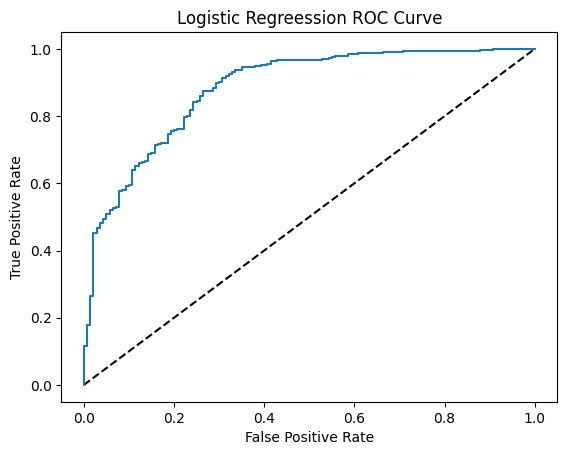

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regreession ROC Curve')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.882247899159664


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8686131386861314
Precision: 0.8870967741935484
Recall: 0.9436274509803921
F1-score: 0.9144893111638955
ROC-AUC: 0.882247899159664
Log Loss: 0.352135307642781
Confusion Matrix:
 [[ 91  49]
 [ 23 385]]


In [22]:
train['rainfall']

,rainfall
0,1
1,1
2,1
3,1
4,0
...,...
2185,1
2186,1
2187,1
2188,1


In [23]:
sum(train['rainfall'] == 1)

1650

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

cloud            0.247476
sunshine         0.184491
humidity         0.128390
day              0.063245
dewpoint         0.061894
pressure         0.058047
windspeed        0.058012
maxtemp          0.055914
temparature      0.052835
mintemp          0.049765
winddirection    0.039932
dtype: float64


In [25]:
X_train_2 = train.drop(['id', 'rainfall', 'winddirection'], axis = 1)
y_train_2 = train['rainfall']

In [26]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_train_2, y_train_2, random_state = 42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.8473497668567216


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8631386861313869
Precision: 0.8827586206896552
Recall: 0.9411764705882353
F1-score: 0.9110320284697508
ROC-AUC: 0.8816876750700281
Log Loss: 0.35167049755117996
Confusion Matrix:
 [[ 89  51]
 [ 24 384]]


In [60]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(2190, 11)

In [63]:
X_train.shape

(2190, 11)

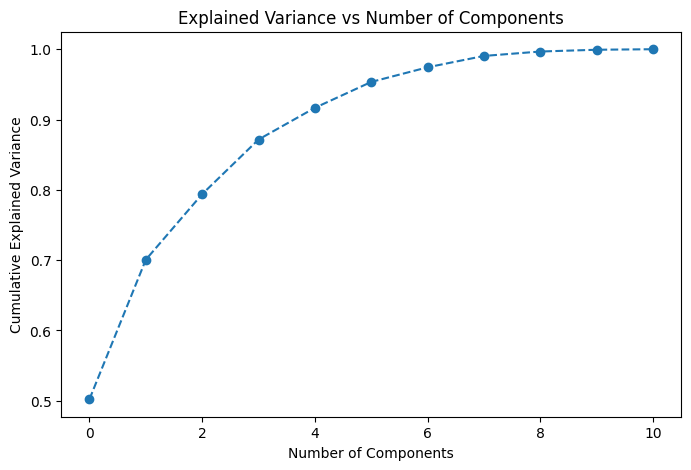

In [64]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X_train_scaled)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

In [65]:
X_train_scaled

array([[-1.70136083,  0.67170214, -0.91380916, ..., -0.72939738,
        -0.56090052, -0.4652908 ],
       [-1.69185328,  1.04311572, -1.79828913, ..., -1.03280391,
        -0.6859253 ,  0.00962944],
       [-1.68234573,  1.85668833, -1.23222195, ...,  1.25653632,
        -0.43587575, -0.37434863],
       ...,
       [ 1.74037217, -0.05343865, -1.30298035, ...,  0.34631671,
        -0.81095007,  1.12114491],
       [ 1.74987972,  1.53833383, -1.76290993, ..., -1.0052215 ,
        -0.81095007, -0.38445331],
       [ 1.75938727,  0.03499315, -0.91380916, ..., -0.75697979,
        -0.43587575,  2.6469525 ]])

In [66]:
pca = PCA(n_components=4)
pca.fit(X_train_scaled)

PCA(n_components=4)

In [68]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [69]:
X_train_scaled.shape

(2190, 11)

In [70]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train, random_state = 42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.8052195480626378


In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8631386861313869
Precision: 0.8863109048723898
Recall: 0.9362745098039216
F1-score: 0.9106078665077473
ROC-AUC: 0.8793242296918767
Log Loss: 0.35806782300358686
Confusion Matrix:
 [[ 91  49]
 [ 26 382]]


In [72]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_selected = X_train
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
print(vif_data)

          Feature          VIF
0             day     4.153185
1        pressure   263.840789
2         maxtemp   751.477096
3     temparature  1825.443006
4         mintemp   919.118538
5        dewpoint   186.588244
6        humidity   205.580673
7           cloud    59.321365
8        sunshine     7.349853
9   winddirection     5.084405
10      windspeed     6.827458


In [83]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train, random_state = 42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.833941605839416
Precision: 0.8764845605700713
Recall: 0.9044117647058824
F1-score: 0.8902291917973462
ROC-AUC: 0.8793242296918767
Log Loss: 0.35806782300358686
Confusion Matrix:
 [[ 88  52]
 [ 39 369]]


In [86]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42)

In [87]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [88]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8613138686131386
Precision: 0.8842592592592593
Recall: 0.9362745098039216
F1-score: 0.9095238095238095
ROC-AUC: 0.8793242296918767
Log Loss: 0.35806782300358686
Confusion Matrix:
 [[ 90  50]
 [ 26 382]]


In [91]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42)

In [92]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

In [93]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8613138686131386
Precision: 0.8755656108597285
Recall: 0.9485294117647058
F1-score: 0.9105882352941177
ROC-AUC: 0.8793242296918767
Log Loss: 0.35806782300358686
Confusion Matrix:
 [[ 85  55]
 [ 21 387]]


In [96]:
X_train = train.drop(['id', 'rainfall'], axis = 1)
y_train = train['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42)

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=50, random_state=42)
model3 = XGBClassifier(n_estimators=50, random_state=42)

# Create voting classifier
voting_model = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    voting='soft'  # 'hard' for majority vote
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs))
print("Log Loss:", log_loss(y_test, y_pred_probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.864963503649635
Precision: 0.8865740740740741
Recall: 0.9387254901960784
F1-score: 0.9119047619047619
ROC-AUC: 0.8793242296918767
Log Loss: 0.35806782300358686
Confusion Matrix:
 [[ 91  49]
 [ 25 383]]
